# Using YOLOV8 for Object Detection on Custom Dataset for Pedestrian Attribute Detection

In [1]:
!nvidia-smi

Mon May 13 22:46:21 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 470.74       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-PCI...  Off  | 00000000:01:00.0 Off |                    0 |
| N/A   59C    P0    49W / 250W |  18860MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  Quadro P2000        Off  | 00000000:C1:00.0 Off |                  N/A |
| 49%   

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.9.19 torch-1.12.1+cu113 CUDA:0 (NVIDIA A100-PCIE-40GB, 40536MiB)
Setup complete ✅ (128 CPUs, 251.8 GB RAM, 89.3/856.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

In [7]:
model = YOLO(f'{HOME}/yolov8l.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /home/cs20b1006/project_files/dog.jpeg: 640x384 1 person, 1 car, 2 dogs, 2 backpacks, 205.0ms
Speed: 66.9ms preprocess, 205.0ms inference, 43.3ms postprocess per image at shape (1, 3, 640, 384)


In [9]:
results[0].boxes.xyxy

tensor([[3.4235e-01, 3.5511e+02, 6.4394e+02, 1.2792e+03],
        [6.2717e+02, 7.3542e+02, 6.9517e+02, 7.8749e+02],
        [6.8089e+01, 2.4898e+02, 6.4773e+02, 9.1309e+02],
        [1.1700e+00, 6.6348e+02, 4.5134e+02, 1.2794e+03],
        [6.9476e-01, 6.6994e+02, 2.7813e+02, 1.1273e+03],
        [6.2677e+01, 2.4889e+02, 6.4700e+02, 1.2673e+03]], device='cuda:0')

In [10]:
results[0].boxes.conf

tensor([0.9154, 0.7678, 0.5584, 0.4022, 0.4007, 0.3604], device='cuda:0')

In [11]:
results[0].boxes.cls

tensor([ 0.,  2., 16., 24., 24., 16.], device='cuda:0')

In [12]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5GuGgZXnoEO3TT8tNY0i")
project = rf.workspace("fyp-qcetd").project("pedestrain-attribute-detection")
version = project.version(2)
dataset = version.download("yolov8")


mkdir: cannot create directory '/home/cs20b1006/project_files/datasets': File exists
/home/cs20b1006/project_files/datasets


/home/cs20b1006/miniconda3/envs/Depth_Anything_torch/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 906.7 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 2.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 2.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    Uninstalling certifi-2024.2.2:
      Successfully uninstalled certifi-2024.2.2
loading Roboflow workspace...
lo


Extracting Dataset Version Zip to Pedestrain-Attribute-Detection-2 in yolov8:: 100%|████████████████████████████████████████████████████████| 1640/1640 [00:01<00:00, 1456.61it/s]


## Custom Training

In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data=/home/cs20b1006/project_files/datasets/Pedestrain-Attribute-Detection-2/data.yaml epochs=100 imgsz=800 plots=True

/home/cs20b1006/miniconda3/envs/Depth_Anything_torch/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/cs20b1006/project_files
New https://pypi.org/project/ultralytics/8.2.14 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.9.19 torch-1.12.1+cu113 CUDA:0 (NVIDIA A100-PCIE-40GB, 40536MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/cs20b1006/project_files/datasets/Pedestrain-Attribute-Detection-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=

      9/100      16.4G     0.9778     0.8371       1.04        239        800: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.631      0.455      0.482      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     10/100      15.7G     0.9578      0.817      1.037        253        800: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.465      0.499      0.499      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     11/100      15.4G      0.931     0.7576       1.02        285        800: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.616      0.406       0.46       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     12/10

     34/100      16.1G     0.6927     0.4474     0.9185        140        800: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.606      0.446      0.486      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     35/100      15.7G     0.6869     0.4433      0.919        174        800: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.472      0.519      0.485      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     36/100      16.3G      0.672     0.4313     0.9126        233        800: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.565      0.466      0.465      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     37/10

     59/100      16.1G     0.5527     0.3492     0.8736        358        800: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.613      0.462      0.521      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     60/100      15.3G     0.5434     0.3405     0.8731        305        800: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.549      0.529      0.537        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     61/100      16.1G     0.5487     0.3413     0.8698        304        800: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.452      0.592      0.515      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     62/10

     84/100      15.6G     0.4645      0.288     0.8482        159        800: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.505      0.488      0.515       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     85/100      16.1G     0.4645     0.2857     0.8496        240        800: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.456       0.56      0.525      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     86/100      15.5G     0.4605     0.2879      0.848        195        800: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.439       0.54       0.53      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     87/10

Speed: 0.5ms preprocess, 5.1ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train4
💡 Learn more at https://docs.ultralytics.com/modes/train


/home/cs20b1006/project_files


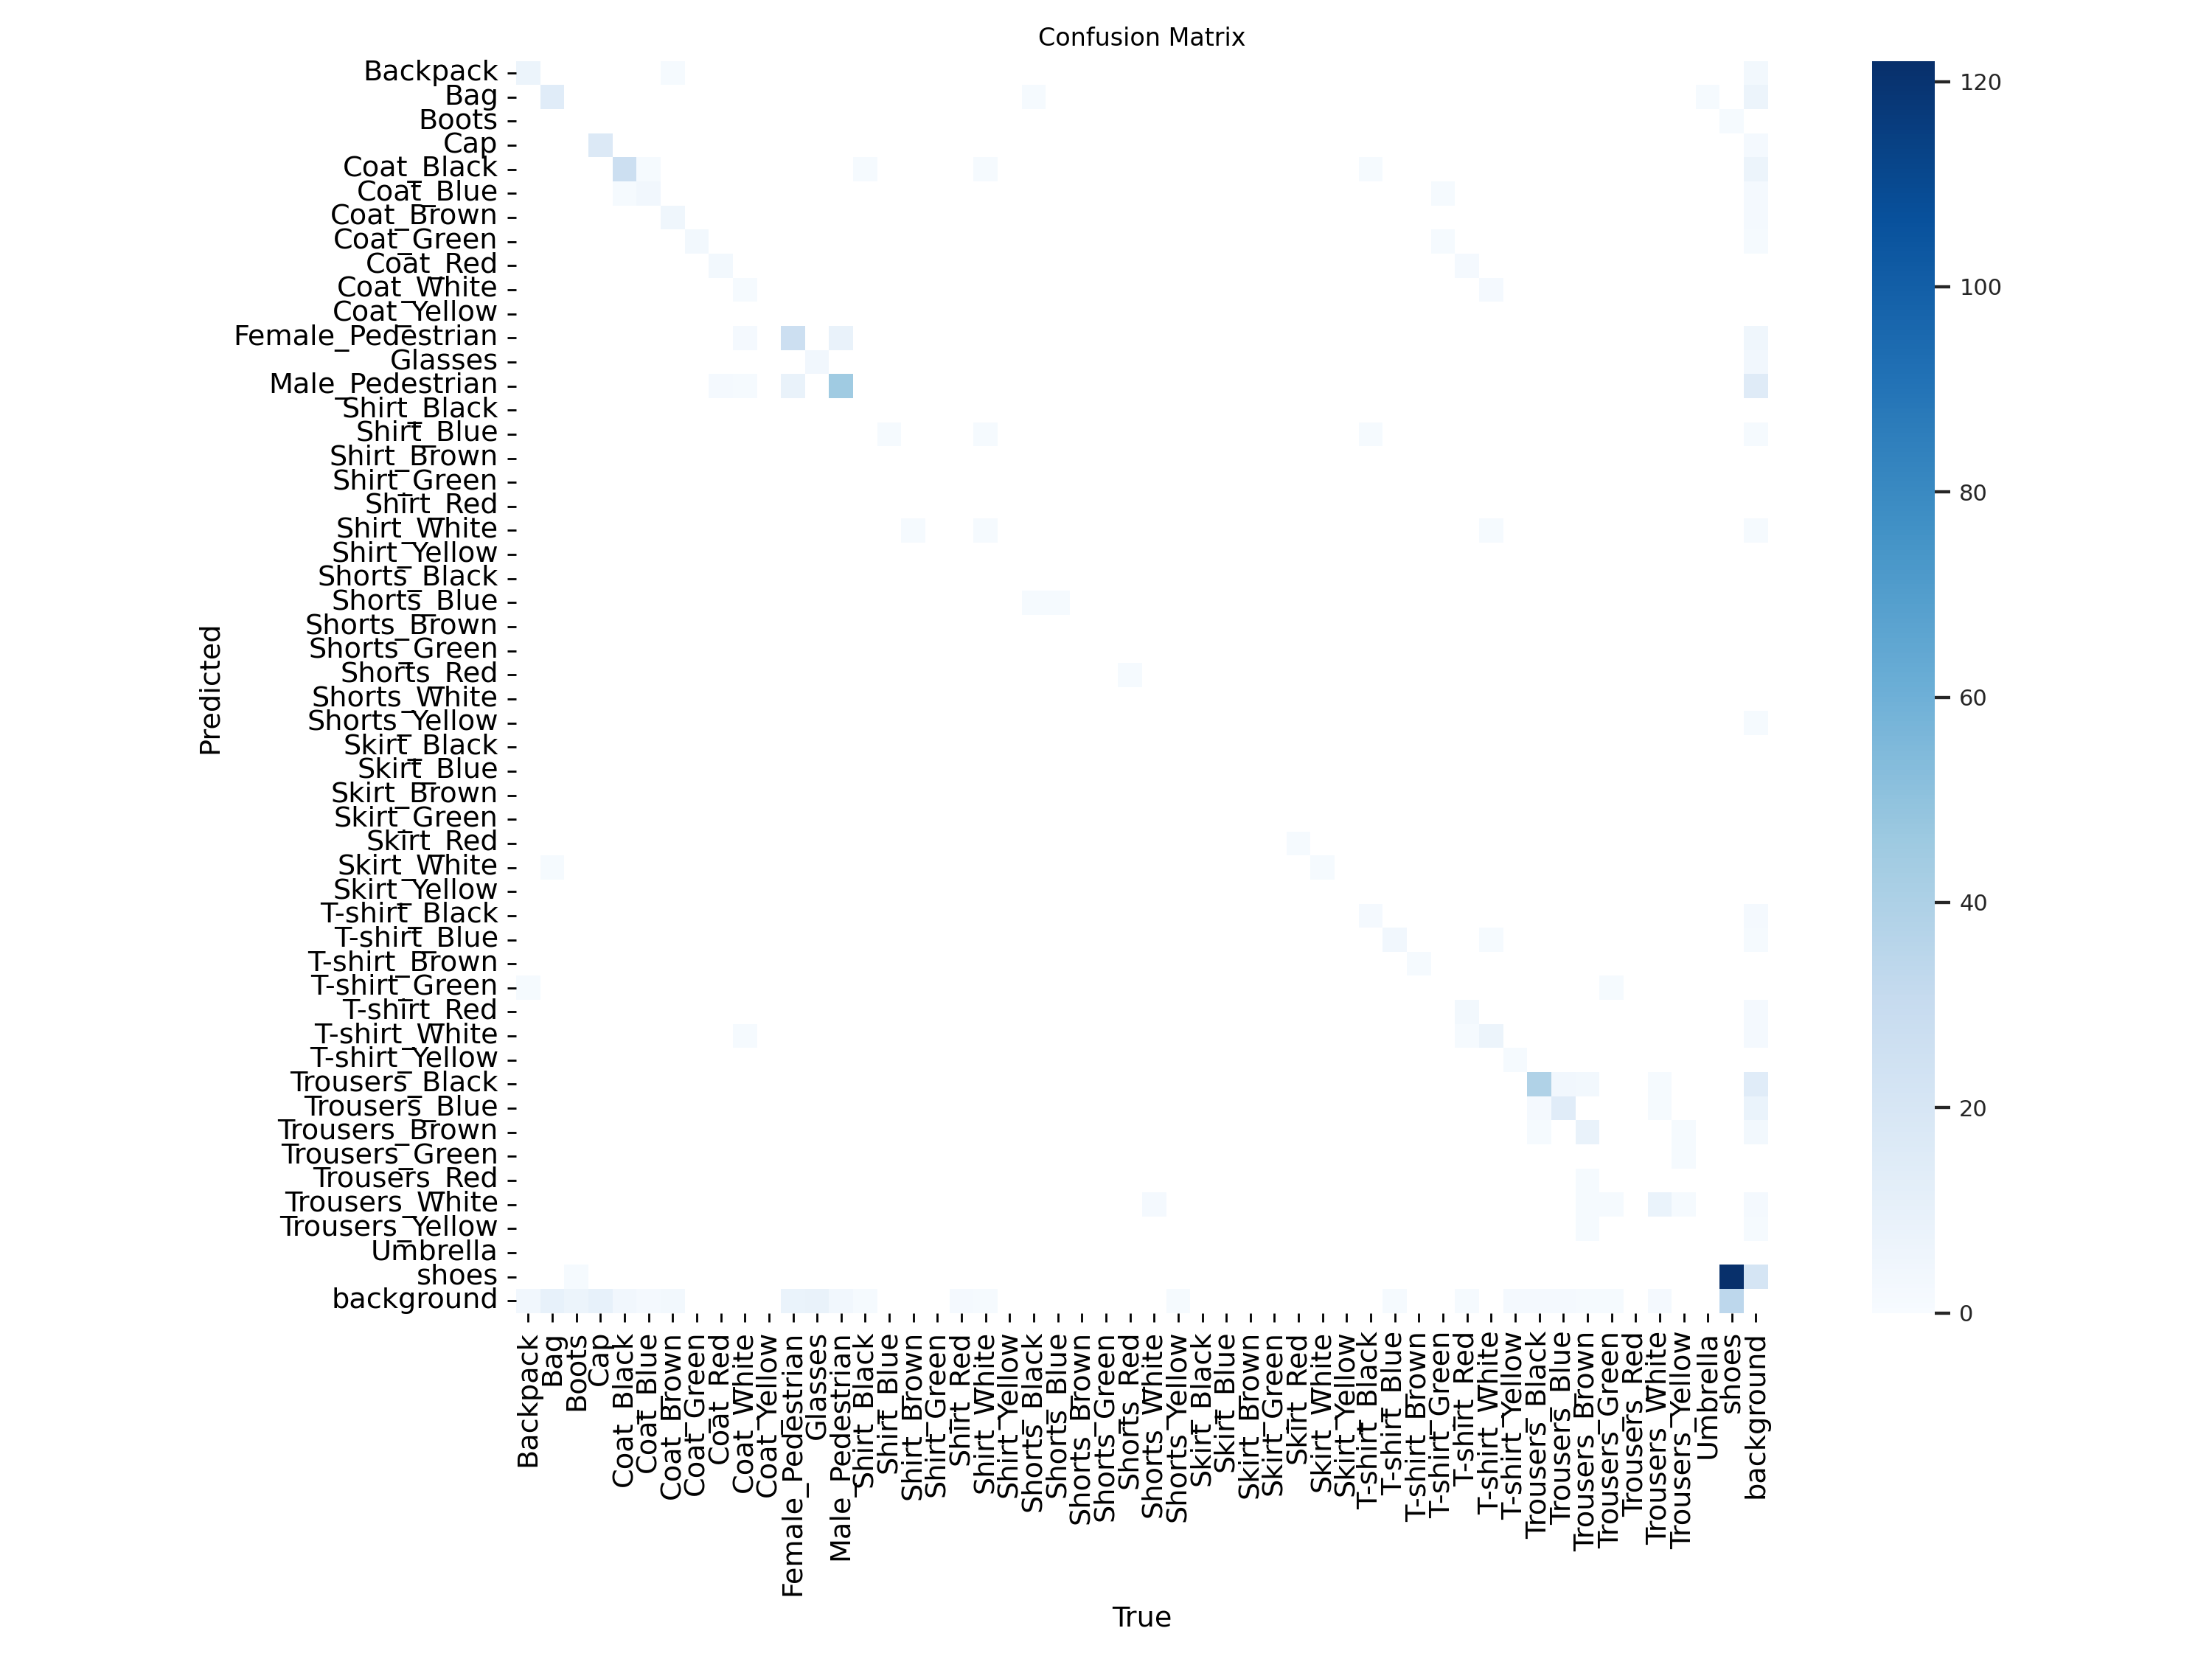

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

/home/cs20b1006/project_files


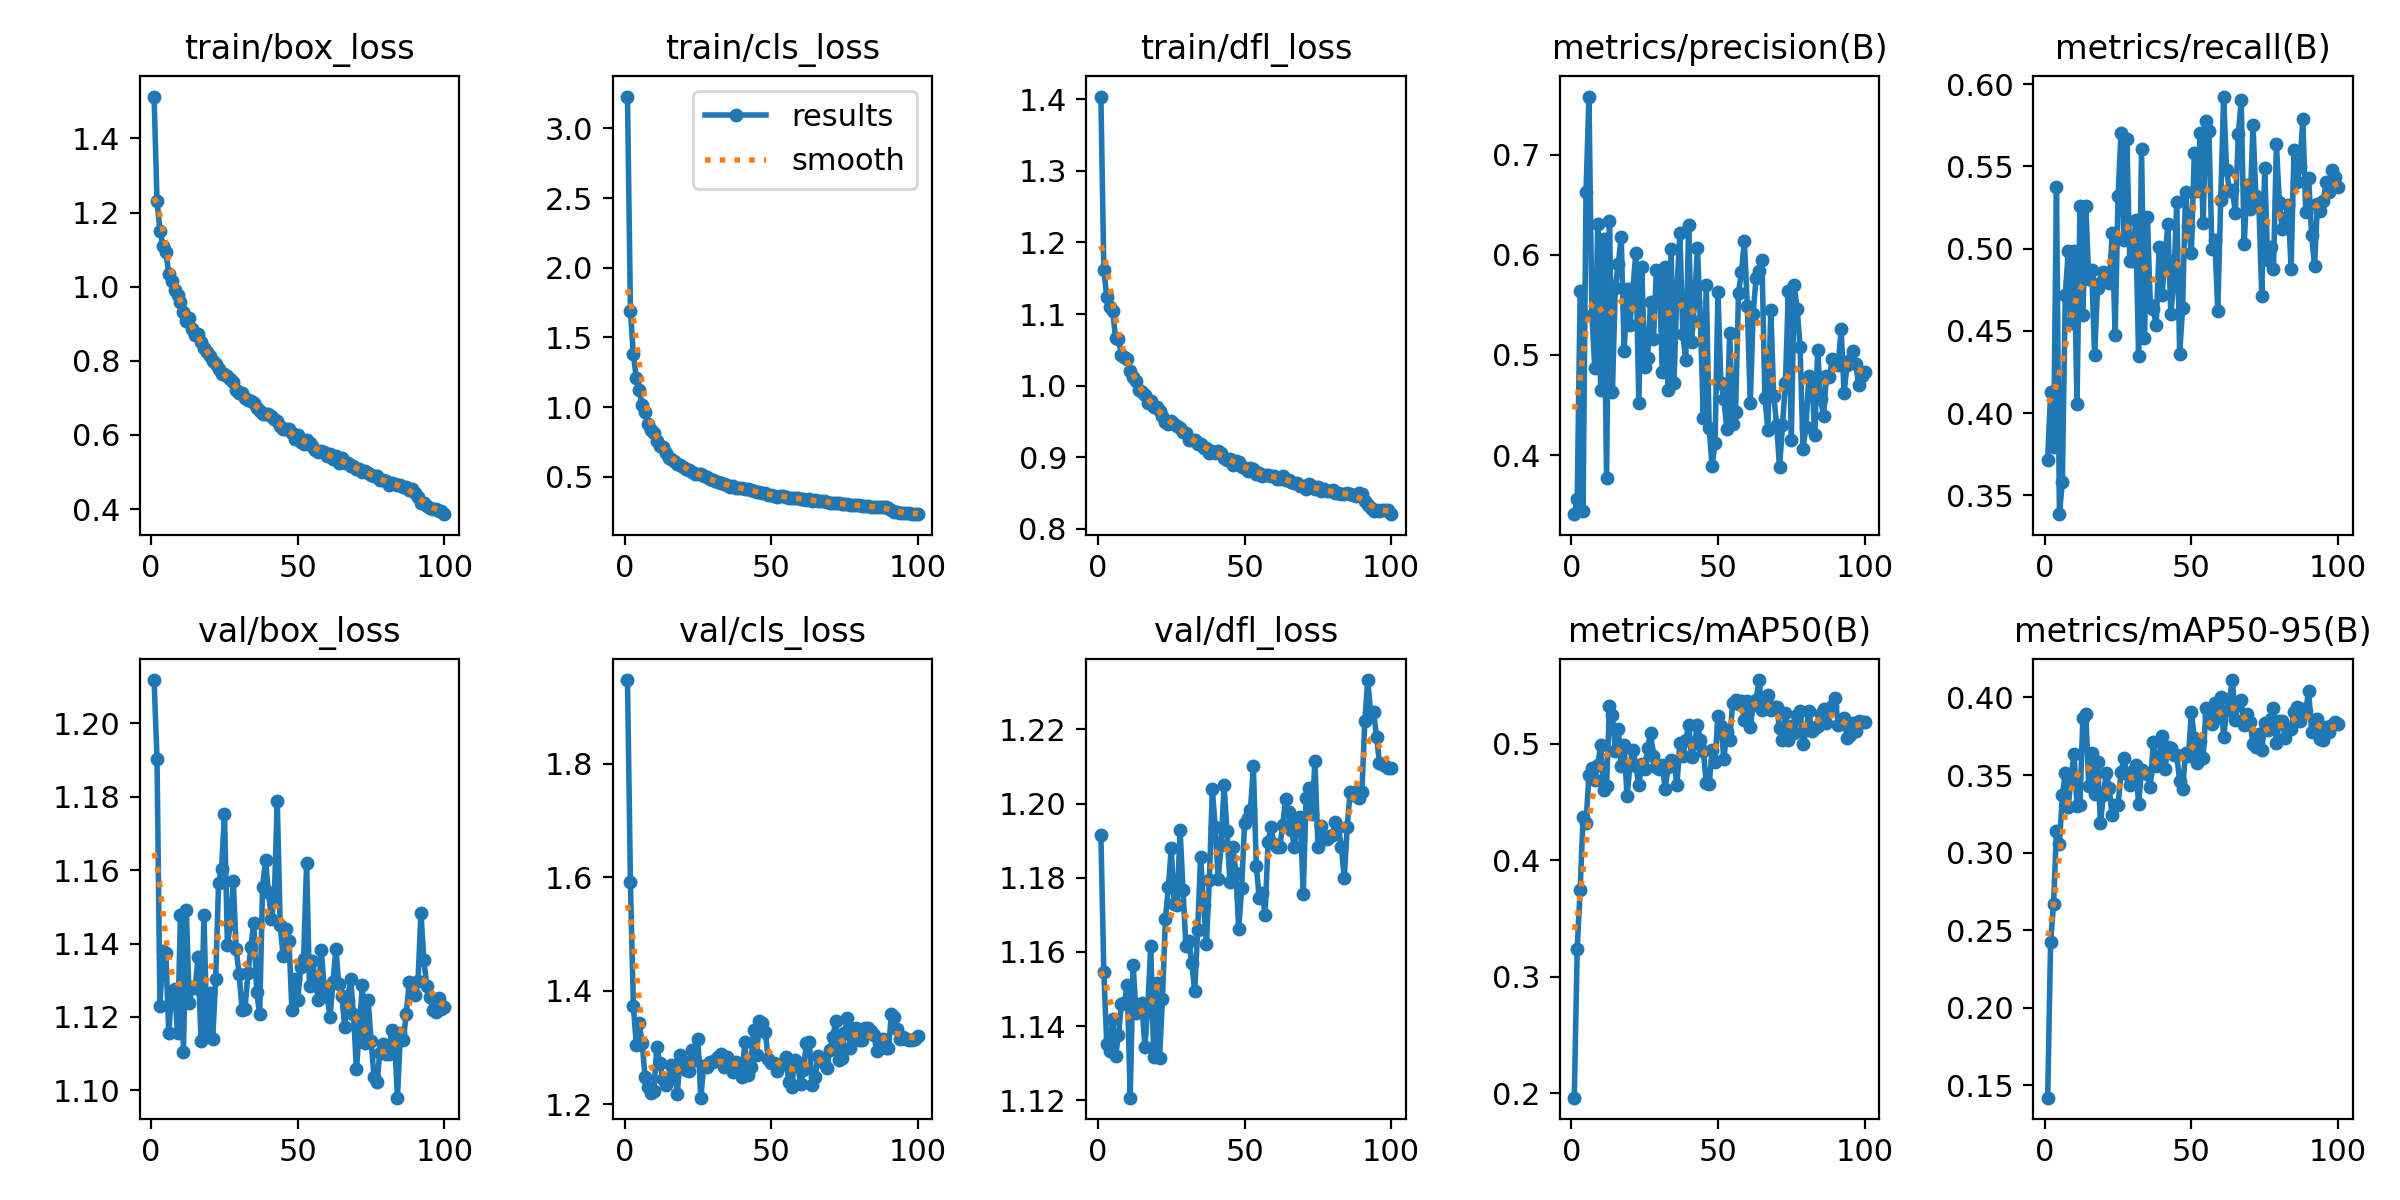

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

/home/cs20b1006/project_files


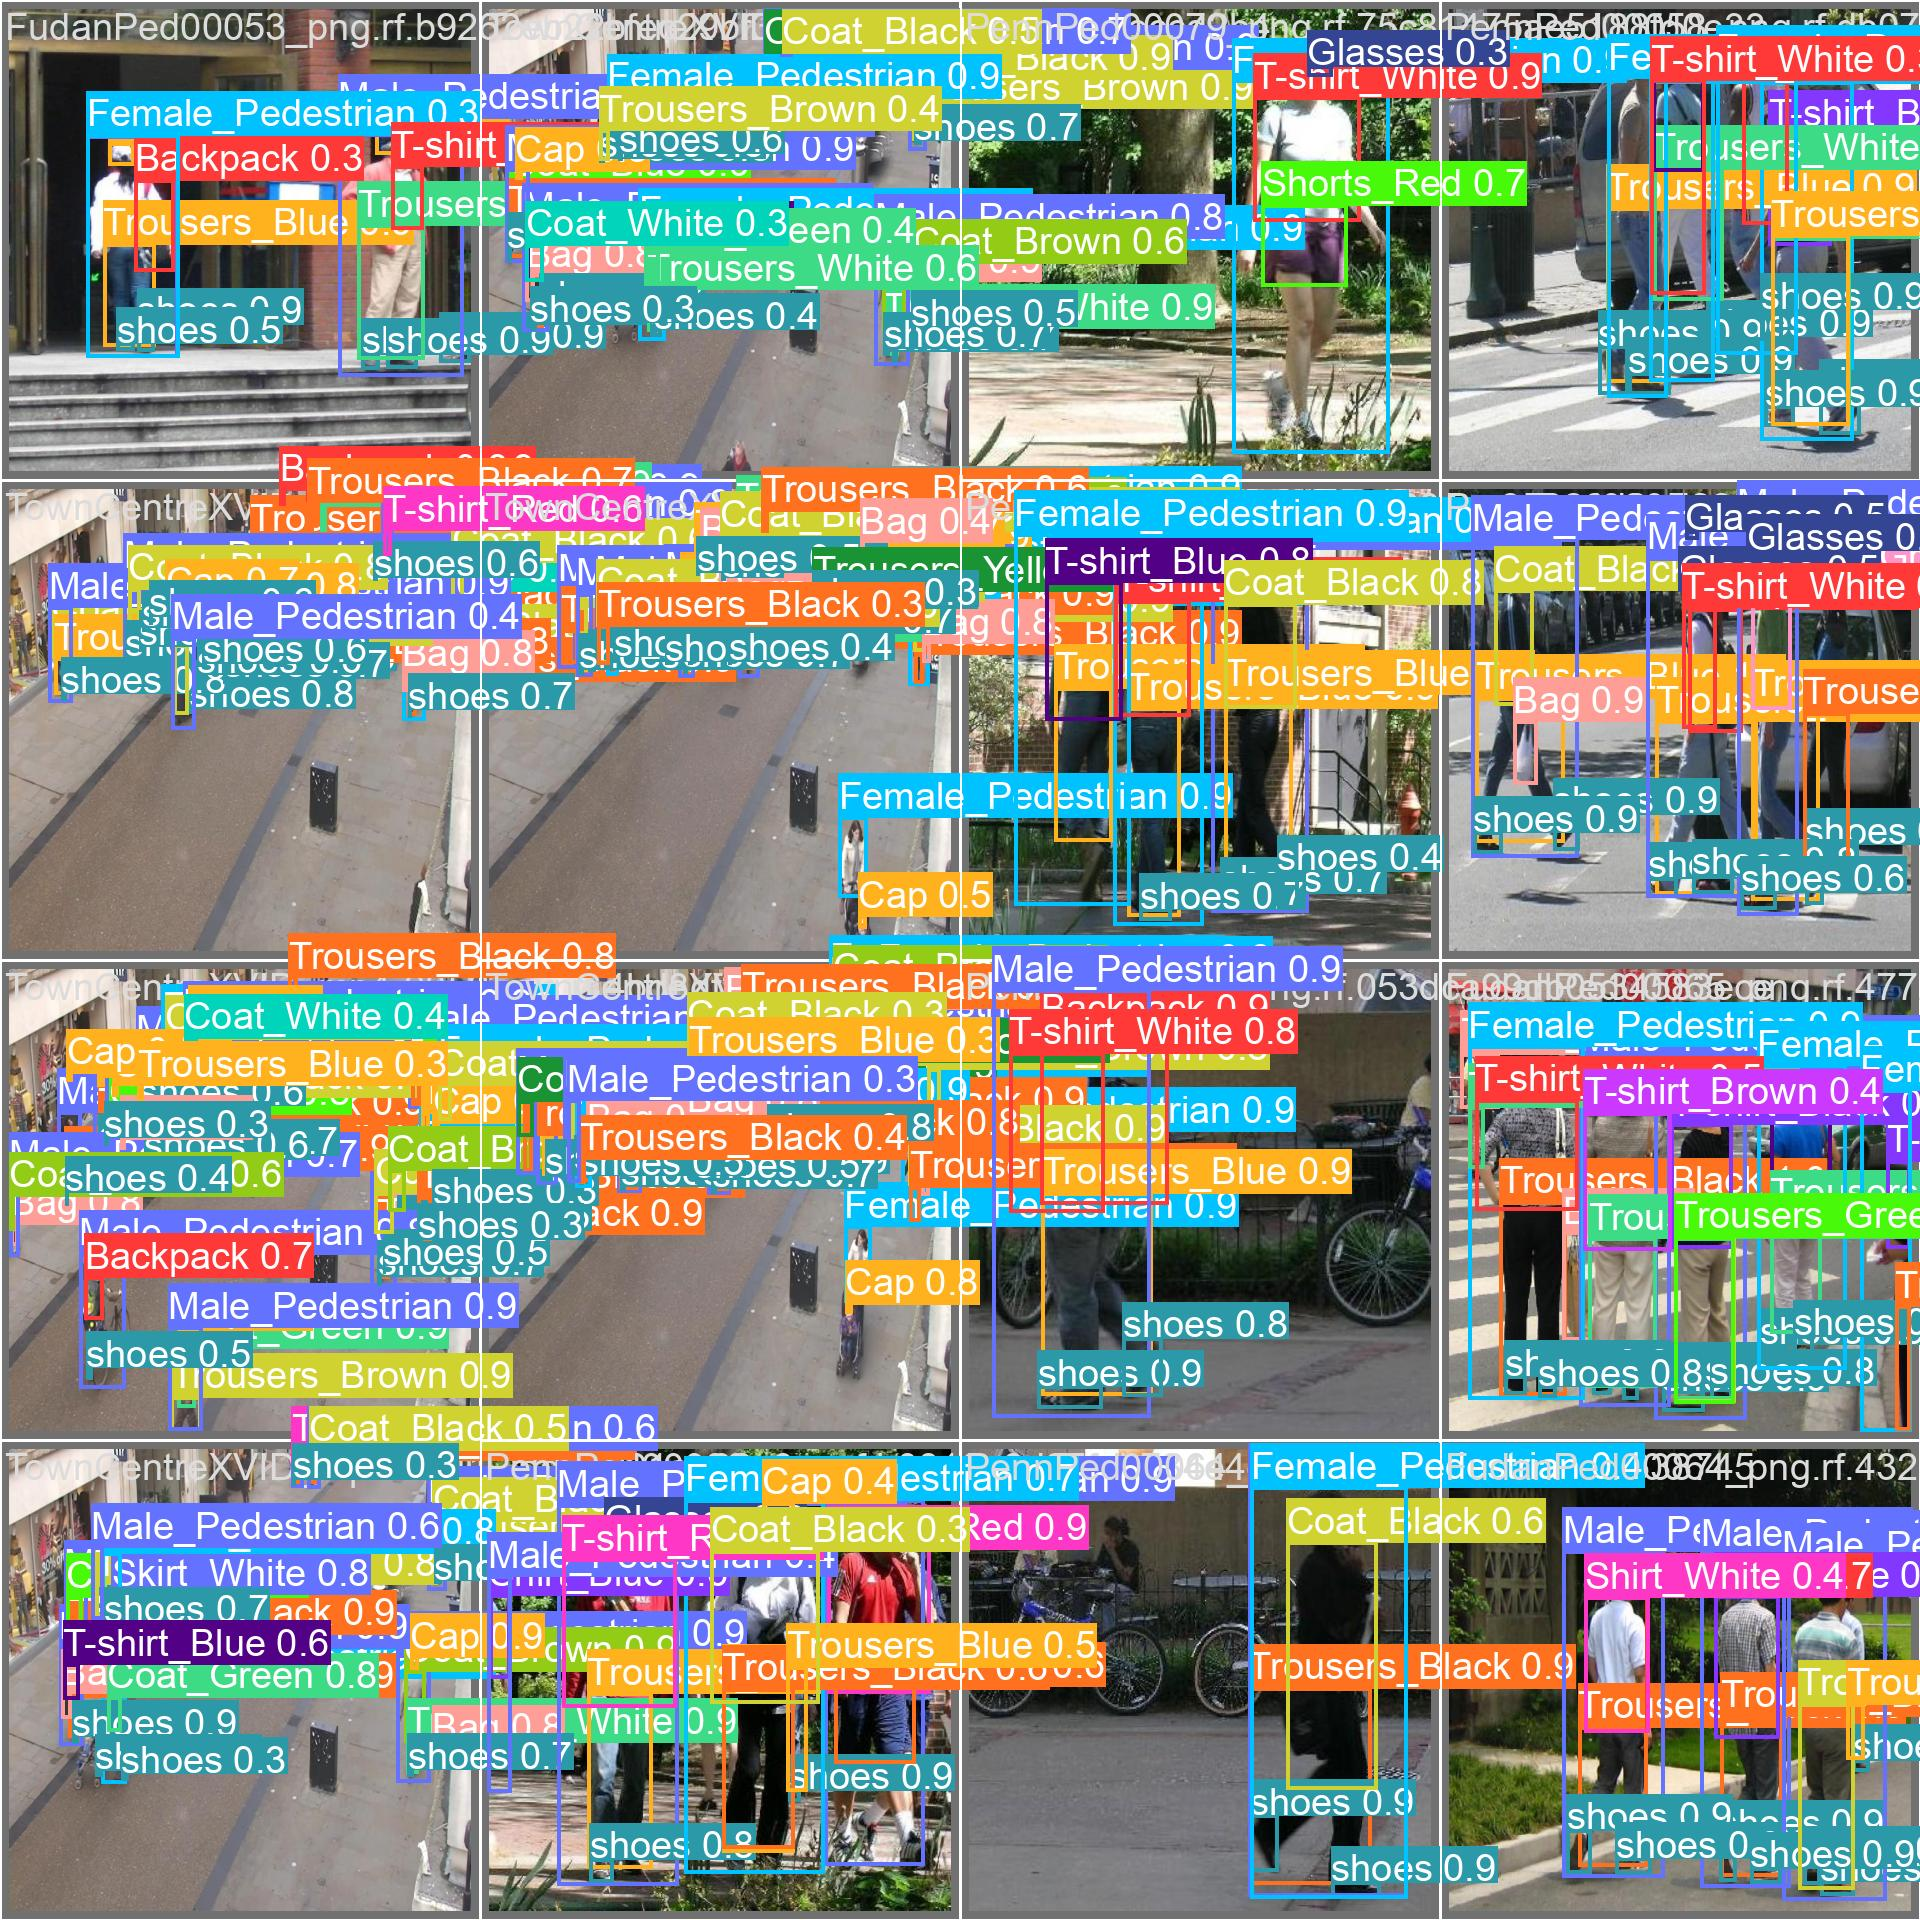

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [13]:
%cd {HOME}

!yolo task=detect mode=val model=/home/cs20b1006/project_files/runs/detect/train4/weights/best.pt data=/home/cs20b1006/project_files/datasets/Pedestrain-Attribute-Detection-2/data.yaml

/home/cs20b1006/project_files
Ultralytics YOLOv8.0.196 🚀 Python-3.9.19 torch-1.12.1+cu113 CUDA:0 (NVIDIA A100-PCIE-40GB, 40536MiB)
Model summary (fused): 268 layers, 43645929 parameters, 0 gradients, 165.0 GFLOPs
val: Scanning /home/cs20b1006/project_files/datasets/Pedestrain-Attribute-Detect
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.584      0.535      0.554      0.412
              Backpack         20         12      0.788       0.75      0.703      0.408
                   Bag         20         25      0.581       0.56      0.627      0.413
                 Boots         20          8          0          0      0.127     0.0412
                   Cap         20         27      0.879      0.704      0.806      0.559
            Coat_Black         20         32      0.695      0.853      0.841      0.451
             Coat_Blue         20          7      0.455      0.571       0.61      0.315
  

## Inference with Custom Model

In [14]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source=/home/cs20b1006/project_files/datasets/Pedestrain-Attribute-Detection-2/test/images save=True

/home/cs20b1006/project_files
Ultralytics YOLOv8.0.196 🚀 Python-3.9.19 torch-1.12.1+cu113 CUDA:0 (NVIDIA A100-PCIE-40GB, 40536MiB)
Model summary (fused): 268 layers, 43645929 parameters, 0 gradients, 165.0 GFLOPs

image 1/20 /home/cs20b1006/project_files/datasets/Pedestrain-Attribute-Detection-2/test/images/FudanPed00057_png.rf.4ef63ddbce80dc7c87a2f7001cce5d48.jpg: 800x800 1 Backpack, 1 Bag, 1 Coat_Black, 5 Female_Pedestrians, 1 Male_Pedestrian, 1 Shirt_Blue, 1 T-shirt_Blue, 2 T-shirt_Whites, 2 Trousers_Blacks, 2 Trousers_Blues, 2 Trousers_Whites, 9 shoess, 35.2ms
image 2/20 /home/cs20b1006/project_files/datasets/Pedestrain-Attribute-Detection-2/test/images/FudanPed00061_png.rf.ef8f22d1c8262dbea979921bd9f0d233.jpg: 800x800 4 Coat_Blacks, 2 Female_Pedestrians, 1 Glasses, 2 Male_Pedestrians, 3 Trousers_Blacks, 3 shoess, 334.7ms
image 3/20 /home/cs20b1006/project_files/datasets/Pedestrain-Attribute-Detection-2/test/images/FudanPed00063_png.rf.a7b833aa0755423bcf15d2e426f3ec94.jpg: 800x800 

**NOTE:** Let's take a look at few results.

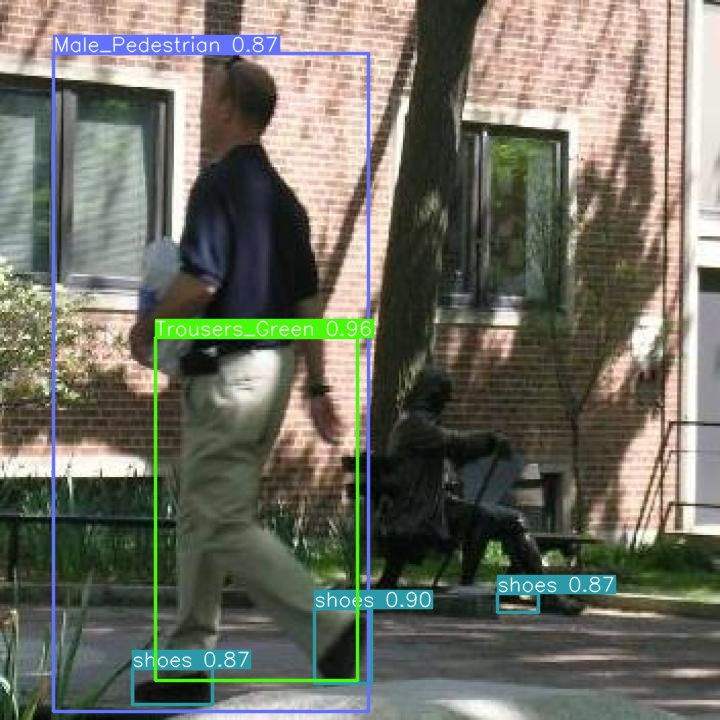

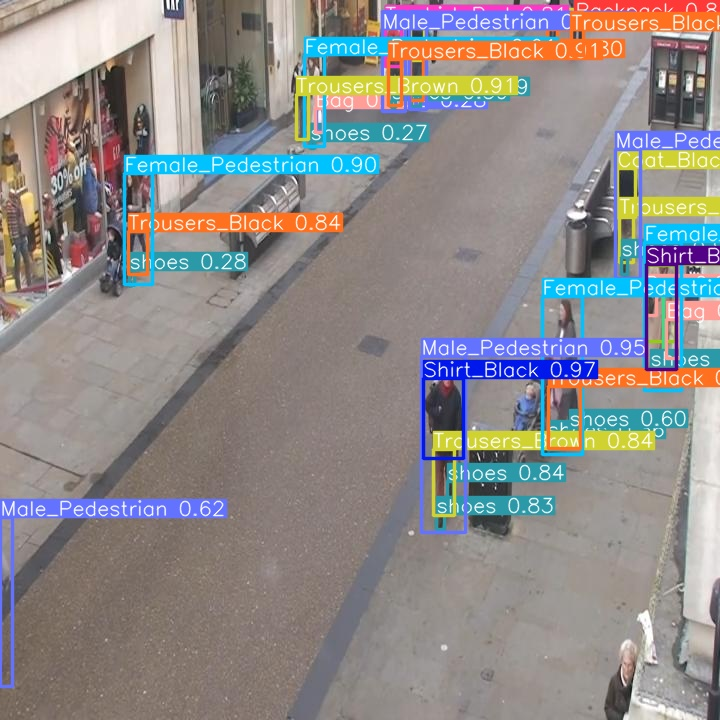

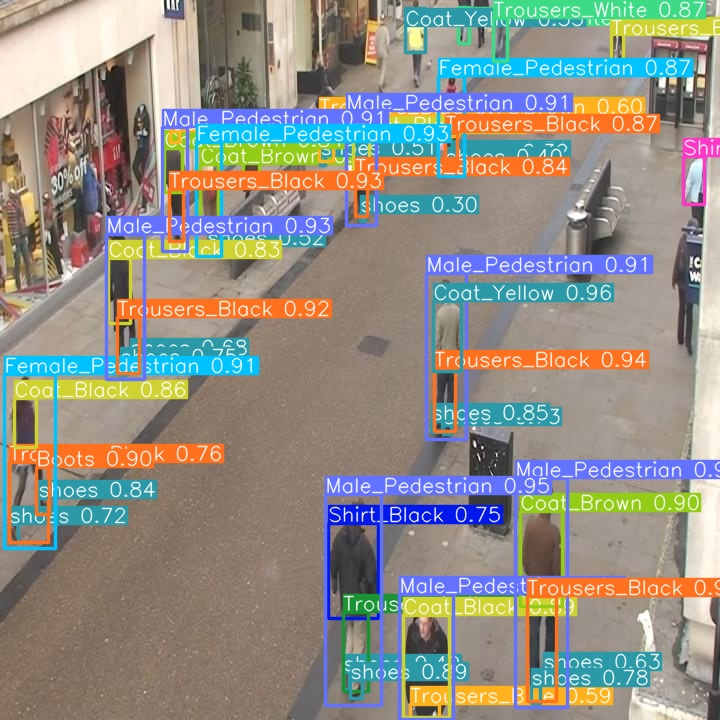

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict4/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [30]:
!zip -r /content/file.zip /content/runs/detect/train3

  adding: content/runs/detect/train3/ (stored 0%)
  adding: content/runs/detect/train3/val_batch0_pred.jpg (deflated 8%)
  adding: content/runs/detect/train3/train_batch495.jpg (deflated 12%)
  adding: content/runs/detect/train3/labels_correlogram.jpg (deflated 43%)
  adding: content/runs/detect/train3/args.yaml (deflated 51%)
  adding: content/runs/detect/train3/val_batch0_labels.jpg (deflated 9%)
  adding: content/runs/detect/train3/train_batch1.jpg (deflated 5%)
  adding: content/runs/detect/train3/train_batch496.jpg (deflated 9%)
  adding: content/runs/detect/train3/train_batch0.jpg (deflated 5%)
  adding: content/runs/detect/train3/train_batch2.jpg (deflated 5%)
  adding: content/runs/detect/train3/weights/ (stored 0%)
  adding: content/runs/detect/train3/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train3/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train3/confusion_matrix.png (deflated 23%)
  adding: content/runs/detect/train3/F1_curve.png (deflated